## Data pre-processing

In [1]:
import pandas as pd

train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# amount of missing data for each attribute
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [3]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [4]:
# separating training labels
train_labels = train_data.Survived.to_numpy()
train_labels.shape

(891,)

In [5]:
train_data.drop(['PassengerId', 'Survived', 'Ticket', 'Cabin'], axis=1, inplace=True)

pclass_sex_group_medians = {}

# obtain median values by Pclass and Sex group
grouped_pclass_medians = train_data.groupby(["Pclass", 'Sex'])["Age"].median()
for key in grouped_pclass_medians.keys():
    pclass_sex_group_medians[f"Pclass_{key[0]}_{key[1]}_median_age"] = grouped_pclass_medians.get(key)

# fill missing 'Age' attribute with median value from class and sex group individual belogs to
for index, row in train_data.iterrows():
    if pd.isnull(row.Age):
        train_data.at[index, "Age"] = pclass_sex_group_medians[f"Pclass_{row.Pclass}_{row.Sex}_median_age"]

pclass_sex_group_medians

{'Pclass_1_female_median_age': 35.0,
 'Pclass_1_male_median_age': 40.0,
 'Pclass_2_female_median_age': 28.0,
 'Pclass_2_male_median_age': 30.0,
 'Pclass_3_female_median_age': 21.5,
 'Pclass_3_male_median_age': 25.0}

In [6]:
# replace names with their titles
train_data["Name"] = train_data["Name"].apply(lambda x: x.split(", ")[1].split(". ")[0])
# all the different titles in dataset
train_data.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [7]:
test_data["Name"] = test_data["Name"].apply(lambda x: x.split(", ")[1].split(". ")[0])
test_data.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

### Rescaling data: normalise vs standardise
https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

If the data has varying scales, it should be rescaled
- normalisaion
    - you don't know the distribution of your data or you know the distribution is not Gaussian
    - useful when the algorithm used does not make assumptions about the distribution of your data, such as kNN and ANN
- standardisation
    - more effective when your data has a Guassian distribution
    - useful when the algorithm used asssumes data having Guassian distribution, such as linear regression, logistic regression, and linear discriminant analysis

In [8]:
# scale data
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

# https://www.kaggle.com/code/rtatman/data-cleaning-challenge-scale-and-normalize-data/notebook
train_data[['Age', 'Fare']] = min_max_scaler.fit_transform(train_data[['Age', 'Fare']])

In [9]:
train_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Mr,male,0.271174,1,0,0.014151,S
1,1,Mrs,female,0.472229,1,0,0.139136,C
2,3,Miss,female,0.321438,0,0,0.015469,S
3,1,Mrs,female,0.434531,1,0,0.103644,S
4,3,Mr,male,0.434531,0,0,0.015713,S


### Encoding categorical data

In [10]:
train_data_encoded = pd.get_dummies(train_data)

train_data_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Name_Capt,Name_Col,Name_Don,Name_Dr,Name_Jonkheer,...,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.271174,1,0,0.014151,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0.472229,1,0,0.139136,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,3,0.321438,0,0,0.015469,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0.434531,1,0,0.103644,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,3,0.434531,0,0,0.015713,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [11]:
train_data_encoded.columns.values

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Capt', 'Name_Col',
       'Name_Don', 'Name_Dr', 'Name_Jonkheer', 'Name_Lady', 'Name_Major',
       'Name_Master', 'Name_Miss', 'Name_Mlle', 'Name_Mme', 'Name_Mr',
       'Name_Mrs', 'Name_Ms', 'Name_Rev', 'Name_Sir', 'Name_the Countess',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype=object)

In [12]:
train_data_np = train_data_encoded.to_numpy()
train_data_np.shape

(891, 27)

In [13]:
# reload and process data again with util module, follow same steps as above
from util import get_processing_parameters, process_data
import pandas as pd

train_data = pd.read_csv('data/train.csv')
train_labels = train_data.Survived.to_numpy()
train_data.drop(['Survived'], axis=1, inplace=True)

test_data = pd.read_csv('data/test.csv')

processing_parameters = get_processing_parameters(train_data)
train_data_np = process_data(train_data.copy(), processing_parameters)
test_data_np = process_data(test_data.copy(), processing_parameters)

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Building and training neural network

In [14]:
from keras import models, layers, regularizers

def build_model():
    model = models.Sequential()
#     kernel_regularizer=regularizers.l2(0.001),
    model.add(layers.Dense(8, activation='relu', input_shape=(10,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid')) # sigmoid used for binary classification

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

- for loss function best to use `binary_crossentropy` loss
- crossentropy is a quantity from the field of information theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions

In [15]:
from sklearn.model_selection import KFold

num_epochs = 100
all_scores = []
kf = KFold(n_splits=4)
for train_index, validation_index in kf.split(train_data_np):
    partial_x_train, x_validation = train_data_np[train_index][:], train_data_np[validation_index][:]
    partial_y_train, y_validation = train_labels[train_index], train_labels[validation_index]
    
    model = build_model()
    history = model.fit(partial_x_train, partial_y_train,
              validation_data=(x_validation, y_validation),
              epochs=num_epochs, batch_size=16,
              verbose=0
    )
    
    validation_accuracy_histories = history.history['val_accuracy']
    all_scores.append(validation_accuracy_histories)

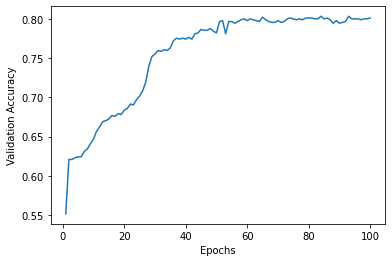

In [16]:
import matplotlib.pyplot as plt
import numpy as np

average_accuracy_history = [
    np.mean([x[i] for x in all_scores]) for i in range(num_epochs)
]

plt.plot(range(1, len(average_accuracy_history) + 1), average_accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [17]:
model = build_model()
model.fit(train_data_np, train_labels,
          epochs=60, batch_size=16,
          verbose=0
)

test_labels = pd.read_csv('data/test_labels.csv').Survived.to_numpy()
model.evaluate(test_data_np, test_labels)

14/14 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7775


[0.4939456284046173, 0.7775119543075562]

## Saving predictions for submission

In [18]:
predictions = model.predict(test_data_np)
predictions.shape

14/14 [==============================] - 0s 3ms/step


(418, 1)

In [19]:
predictions_df = pd.DataFrame(test_data["PassengerId"])
predictions_df["Survived"] = predictions.flatten().tolist()
predictions_df["Survived"] = predictions_df["Survived"].apply(lambda x: 0 if x<0.5 else 1 )
predictions_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [20]:
predictions_df.to_csv('data/ANN_predictions.csv', index=False)